

<center> <h1 style="background-color:purple; color:white" >RFM Analysis</h1> 


    
<br>    
    
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" style="background-color:purple; color:white" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab" aria-controls="profile" style="color:purple">Import Libraries<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">1</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages" style="color:purple">Load Data<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white"></span></a>
  <a class="list-group-item list-group-item-action"  data-toggle="list" href="#missing" role="tab" aria-controls="settings" style="color:purple">Missing Values<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#summary" role="tab" aria-controls="settings" style="color:purple">Summary Stats & Outlier Values<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#rfm" role="tab" aria-controls="settings" style="color:purple">RFM<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#visualize" role="tab" aria-controls="settings" style="color:purple"> Visualize<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#notebooks" role="tab" aria-controls="settings" style="color:purple"> My Notebooks<span class="badge badge-primary badge-pill" style="background-color:steelblue; color:white"></span></a>


<h1 style="color:purple" >RFM - Recency Frequency Monetary</h1> 

RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

RFM stands for the three dimensions:

- **R**ecency – How recently did the customer purchase?
- **F**requency – How often do they purchase?
- **M**onetary Value – How much do they spend?

Customer purchases may be represented by a table with columns for the customer name, date of purchase and purchase value. One approach to RFM is to assign a score for each dimension on a scale from 1 to 10. The maximum score represents the preferred behavior and a formula could be used to calculate the three scores for each customer. For example, a service-based business could use these calculations:

- **Recency** = the maximum of "10 – the number of months that have passed since the customer last purchased" and 1
- **Frequency** = the maximum of "the number of purchases by the customer in the last 12 months (with a limit of 10)" and 1
- **Monetary** = the highest value of all purchases by the customer expressed as a multiple of some benchmark value

Alternatively, categories can be defined for each attribute. For instance, Recency might be broken into three categories: customers with purchases within the last 90 days; between 91 and 365 days; and longer than 365 days. Such categories may be derived from business rules or using data mining techniques to find meaningful breaks.

Once each of the attributes has appropriate categories defined, segments are created from the intersection of the values. If there were three categories for each attribute, then the resulting matrix would have twenty-seven possible combinations (one well-known commercial approach uses five bins per attributes, which yields 125 segments). Companies may also decide to collapse certain subsegments, if the gradations appear too small to be useful. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value). Identifying the most valuable RFM segments can capitalize on chance relationships in the data used for this analysis. For this reason, it is highly recommended that another set of data be used to validate the results of the RFM segmentation process. Advocates of this technique point out that it has the virtue of simplicity: no specialized statistical software is required, and the results are readily understood by business people. In the absence of other targeting techniques, it can provide a lift in response rates for promotions.



<a id='libraries'></a>
<h1 style="color:purple" >0. Adding Google Drive</h1> 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<a id='libraries'></a>
<h1 style="color:purple" >1.Packages</h1> 

In [2]:
!pip install squarify
# ----------------------------
# BASE
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# TREEMAP
# pip install squarify
import squarify  

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

<a id='load'></a>
<h1 style="color:purple" >2. Data</h1> 

In [3]:
raw = pd.read_excel("/content/drive/MyDrive/freelancing/datawarehouse/Datawarehouse/Online Retail.xlsx")
df1 = raw.copy()


In [4]:
#showing shape of dataframe
print(df1.shape)

(541909, 8)


In [5]:
#displayiny first and last 10 values from dataframe
print("-------------First 10 rows of Dataframe--------------------------")
print(df1.head())
print("-------------First 10 rows of Dataframe--------------------------")
print(df1.tail())

-------------First 10 rows of Dataframe--------------------------
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55    17850.00  United Kingdom  
1 2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
2 2010-12-01 08:26:00       2.75    17850.00  United Kingdom  
3 2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
4 2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
-------------First 10 rows of Dataframe--------------------------
       InvoiceNo StockCode                      Descripti

In [6]:
#printing Datatypes of columns
print(df1.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


<a id='missing'></a>
<h1 style="color:purple" >3. Missing Values</h1> 

In [7]:

print("Missing Frequency: \n")
print(df1.isnull().sum().sort_values(ascending = False), "\n")
print("Missing Proportion: \n")
print((df1.isnull().sum() / df1.shape[0]).sort_values(ascending = False))



Missing Frequency: 

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64 

Missing Proportion: 

CustomerID    0.25
Description   0.00
InvoiceNo     0.00
StockCode     0.00
Quantity      0.00
InvoiceDate   0.00
UnitPrice     0.00
Country       0.00
dtype: float64


In [8]:
# Remove Missing Values
df1.dropna(inplace = True)


<a id='summary'></a>
<h1 style="color:purple" >4. Summary Stats & Outlier Values</h1> 

In [9]:

df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.00,12.06,248.69,-80995.00,2.00,5.00,12.00,80995.00
UnitPrice,406829.00,3.46,69.32,0.00,1.25,1.95,3.75,38970.00
CustomerID,406829.00,15287.69,1713.60,12346.00,13953.00,15152.00,16791.00,18287.00


In [10]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,406829.00,12.06,248.69,-80995.00,-2.00,1.00,1.00,1.00,5.00,24.00,36.00,120.00,80995.00
UnitPrice,406829.00,3.46,69.32,0.00,0.21,0.42,0.55,0.85,1.95,6.75,8.50,15.00,38970.00
CustomerID,406829.00,15287.69,1713.60,12346.00,12415.00,12626.00,12876.00,13536.00,15152.00,17719.00,17905.00,18212.00,18287.00


**Remove negative values!**

Negative values are returned items.

In [11]:
df1 = df1[~df1["InvoiceNo"].str.contains("C", na = False)]


In [ ]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,397924.00,13.02,180.42,1.00,1.00,1.00,1.00,2.00,6.00,24.00,36.00,120.00,80995.00
UnitPrice,397924.00,3.12,22.10,0.00,0.21,0.42,0.55,0.85,1.95,6.35,8.50,14.95,8142.75
CustomerID,397924.00,15294.32,1713.17,12346.00,12415.00,12627.00,12883.00,13552.00,15159.00,17725.00,17912.00,18211.00,18287.00


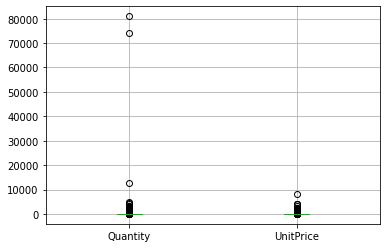

In [12]:
df1[["Quantity", "UnitPrice"]].boxplot();

<a id='rfm'></a>
<h1 style="color:purple" >5. RFM Analysis</h1> 

<h2 style="color:purple" >Recency</h2> 

In [13]:
print("2009-2010: Min Date", df1["InvoiceDate"].min(), "Max Date", df1["InvoiceDate"].max())


2009-2010: Min Date 2010-12-01 08:26:00 Max Date 2011-12-09 12:50:00


In [14]:
recency1 = (dt.datetime(2010, 12, 9) - df1.groupby("CustomerID").agg({"InvoiceDate":"max"})).rename(columns = {"InvoiceDate":"Recency"})

recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)


recency1.head(20)

,Recency
CustomerID,
12346.00,-41
12347.00,-364
12348.00,-291
12349.00,-348
12350.00,-56
12352.00,-330
12353.00,-162
12354.00,-134
12355.00,-152


<h2 style="color:purple" >Frequency</h2> 


In [15]:
freq1 = df1.groupby("CustomerID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})

freq1

,Frequency
CustomerID,
12346.00,1
12347.00,7
12348.00,4
12349.00,1
12350.00,1
...,...
18280.00,1
18281.00,1
18282.00,2


<h2 style="color:purple" >Monetary</h2> 


In [16]:
df1["TotalPrice"] = df1["Quantity"] * df1["UnitPrice"]


monetary1 = df1.groupby("CustomerID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})


monetary1.head()

,Monetary
CustomerID,
12346.00,77183.60
12347.00,4310.00
12348.00,1797.24
12349.00,1757.55
12350.00,334.40


In [17]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)


rfm1.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.00,-41,1,77183.60
12347.00,-364,7,4310.00
12348.00,-291,4,1797.24
12349.00,-348,1,1757.55
12350.00,-56,1,334.40


<h2 style="color:purple" >Create RFM Score</h2> 

In [18]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])


rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])


rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])


rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
CustomerID,,,,,,
12346.00,-41,1,77183.60,1,1,5
12347.00,-364,7,4310.00,5,5,5
12348.00,-291,4,1797.24,2,4,4
12349.00,-348,1,1757.55,4,1,4
12350.00,-56,1,334.40,1,1,2


In [19]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))


rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
CustomerID,,,,,,,
12346.00,-41,1,77183.60,1,1,5,115
12347.00,-364,7,4310.00,5,5,5,555
12348.00,-291,4,1797.24,2,4,4,244
12349.00,-348,1,1757.55,4,1,4,414
12350.00,-56,1,334.40,1,1,2,112


In [25]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)

rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)



rfm1.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
CustomerID,,,,,,,,
12346.00,-41,1,77183.60,1,1,5,115,Hibernating
12347.00,-364,7,4310.00,5,5,5,555,Champions
12348.00,-291,4,1797.24,2,4,4,244,At Risk
12349.00,-348,1,1757.55,4,1,4,414,Promising
12350.00,-56,1,334.40,1,1,2,112,Hibernating


<h2 style="color:purple" >Summary Statistics</h2> 

In [21]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,-313.63,-314.00,353,10.97,1.16,1.00,353,0.37,472.55,331.95,353,532.93
At Risk,-212.96,-228.00,594,68.64,2.87,3.00,594,0.94,1079.81,675.16,594,2559.61
Can't Loose,-234.95,-260.00,64,65.15,8.31,7.00,64,4.14,2791.01,2236.74,64,2074.24
Champions,-360.63,-362.00,632,3.68,12.34,8.00,632,16.37,6866.75,2613.85,632,20354.67
Hibernating,-149.34,-148.00,1069,92.04,1.10,1.00,1069,0.30,488.86,293.00,1069,2421.94
Loyal Customers,-333.31,-337.00,820,15.60,6.44,5.00,820,4.45,2862.89,1737.83,820,6003.49
Need Attention,-314.73,-315.00,184,11.53,2.32,2.00,184,0.47,894.49,637.77,184,1110.27
New Customers,-359.57,-359.00,42,3.90,1.00,1.00,42,0.00,388.21,274.50,42,570.78
Potential Loyalists,-349.63,-349.00,486,9.34,2.01,2.00,486,0.65,1041.34,524.00,486,7640.53


<a id='visualize'></a>
<h1 style="color:purple" >6. Visualize</h1> 

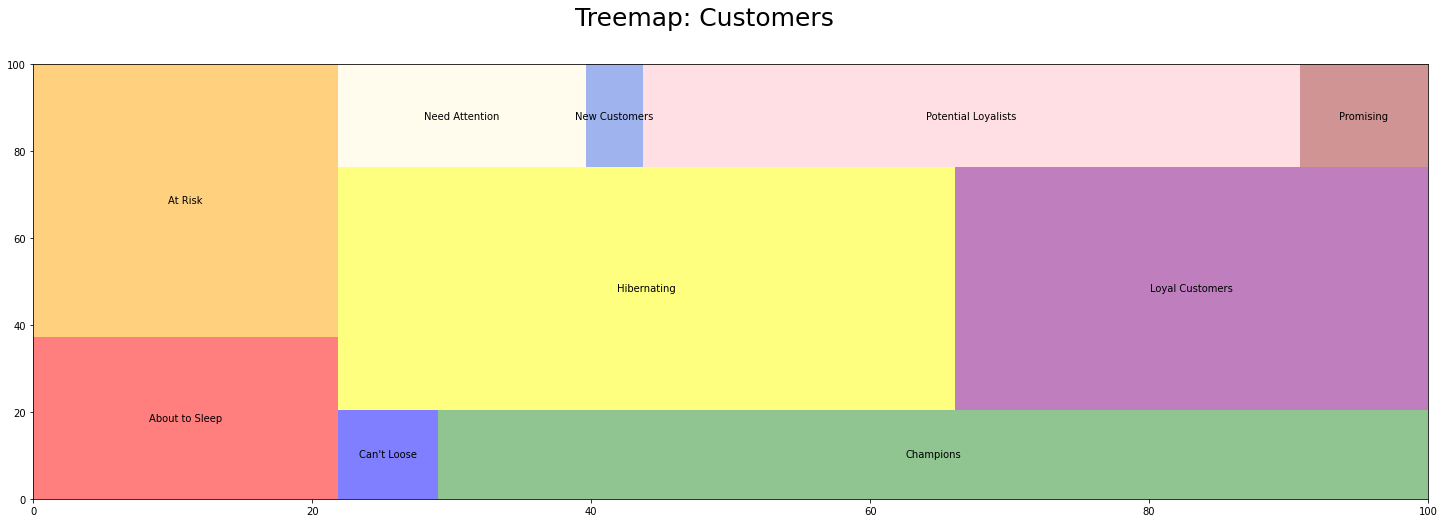

In [27]:
plt.figure(figsize = (25,8))
squarify.plot(sizes=rfmStats1.Recency_count, label=rfmStats1.index, 
              color=["red","orange","blue", "forestgreen", "yellow", "purple", "cornsilk","royalblue", "pink", "brown"], alpha=.5 )
plt.suptitle("Treemap: Customers ", fontsize=25);
